In [1]:
%matplotlib inline



# Online user actions

This example reproduces a typical data science situation in an internet company. We start from a pandas DataFrame with online user actions, for instance for an online text editor: the user can create a page, edit it, or delete it. We want to construct and visualize a graph of the users highlighting collaborations on the same page/project.


In [2]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's start by preparing some toy data representing online users. Each row
indicates a certain action taken by a user (e.g. click on a button within a
website). Actual user data usually come with time stamp, but that's not
essential for this example.



In [3]:
action_dataframe = pd.DataFrame([
    ['dsj3239asadsa3', 'createPage', 'greatProject'],
    ['2r09ej221sk2k5', 'editPage', 'greatProject'],
    ['dsj3239asadsa3', 'editPage', 'greatProject'],
    ['789dsadafj32jj', 'editPage', 'greatProject'],
    ['oi32ncwosap399', 'editPage', 'greatProject'],
    ['4r4320dkqpdokk', 'createPage', 'miniProject'],
    ['320eljl3lk3239', 'editPage', 'miniProject'],
    ['dsj3239asadsa3', 'editPage', 'miniProject'],
    ['3203ejew332323', 'createPage', 'private'],
    ['3203ejew332323', 'editPage', 'private'],
    ['40m11919332msa', 'createPage', 'private2'],
    ['40m11919332msa', 'editPage', 'private2'],
    ['dsj3239asadsa3', 'createPage', 'anotherGreatProject'],
    ['2r09ej221sk2k5', 'editPage', 'anotherGreatProject'],
    ],
    columns=['userid', 'action', 'project'],
)

The goal of this example is to check when two users worked on the same page.
We choose to use a weighted adjacency matrix for this, i.e. a table with rows
and columns indexes by the users that has nonzero entries whenever folks
collaborate. First, let's get the users and prepare an empty matrix:



In [4]:
users = action_dataframe['userid'].unique()
adjacency_matrix = pd.DataFrame(
    np.zeros((len(users), len(users)), np.int32),
    index=users,
    columns=users,
)

Then, let's iterate over all projects one by one, and add all collaborations:



In [5]:
for project, project_data in action_dataframe.groupby('project'):
    project_users = project_data['userid'].values
    for i1, user1 in enumerate(project_users):
        for user2 in project_users[:i1]:
            adjacency_matrix.at[user1, user2] += 1

There are many ways to achieve the above matrix, so don't be surprised if you
came up with another algorithm ;-) Now it's time to make the graph:



In [6]:
g = ig.Graph.Weighted_Adjacency(adjacency_matrix, mode='plus')

We can take a look at the graph via plotting functions. We can first make a
layout:



In [7]:
layout = g.layout('circle')

Then we can prepare vertex sizes based on their closeness to other vertices



In [8]:
vertex_size = g.closeness()
vertex_size = [0.5 * v**2 if not np.isnan(v) else 0.05 for v in vertex_size]

Finally, we can plot the graph:



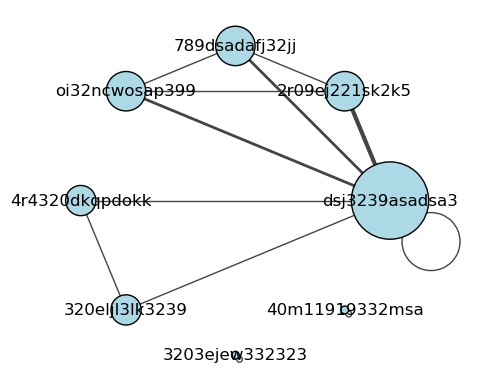

In [9]:
fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_label=g.vs['name'],
    vertex_color="lightblue",
    vertex_size=vertex_size,
    edge_width=g.es["weight"],
)
plt.show()

Loops indicate "self-collaborations", which are not very meaningful. To
filter out loops without losing the edge weights, we can use:



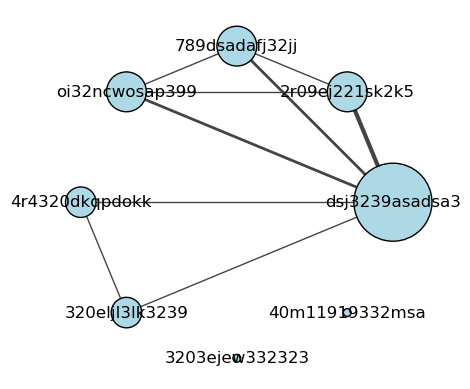

In [10]:
g = g.simplify(combine_edges='first')

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_label=g.vs['name'],
    vertex_color="lightblue",
    vertex_size=vertex_size,
    edge_width=g.es["weight"],
)
plt.show()